In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
#Using the pandas framework a dataset is created using the "BooksDataSet.csv" file.

books=pd.read_csv('./coding/with_multi_tags/Amazon.csv')

#We only keep the 4 neccessary columns that we will be need. 
books=pd.DataFrame(books,columns=['problem_statement','title','tags','num_occur'])


In [21]:
# function for text cleaning
 
def clean(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

books.loc[:,'problem_statement']=books.loc[:,'problem_statement'].apply(lambda x: clean(x))

Graph to visualize the words and frequency in problem_statement.




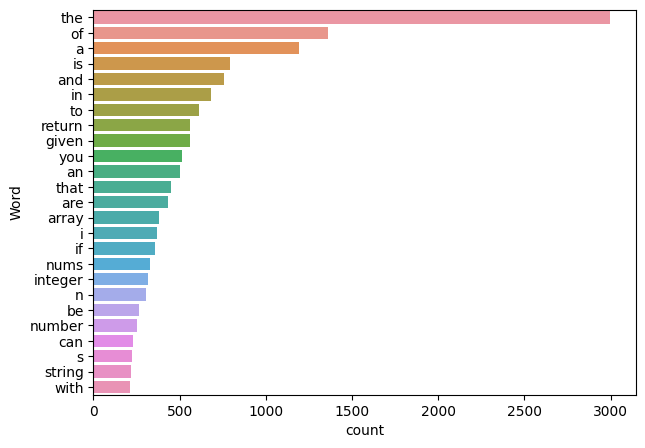

In [22]:
#Function to visualize the words and frequency in book's summary.

print("Graph to visualize the words and frequency in problem_statement.\n\n")

def freqwords(x, terms): 
  allwords = ' '.join([text for text in x]) 
  allwords = allwords.split() 
  fdist = nltk.FreqDist(allwords) 
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  d = wordsdf.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(7,5)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 25 most frequent words 
freqwords(books['problem_statement'], 25)

In [23]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

books['problem_statement'] = books['problem_statement'].apply(lambda x: removestopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['problem_statement'] = books['problem_statement'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['problem_statement'] = books['problem_statement'].apply(lambda x: stemming(x))

In [26]:
books['problem_statement']

0      design data structur follow constraint least r...
1      given array integ num integ target return inde...
2      given x n binari grid grid repres map land wat...
3      given array interv interv starti endi merg ove...
4      given array string product string searchword d...
                             ...                        
521    given two integ left right return count number...
522    integ monoton increas digit pair adjac digit x...
523    given integ array num adjac integ num perform ...
524    complex number repres string form real imagina...
525    given integ array num length n assum arrk arra...
Name: problem_statement, Length: 526, dtype: object

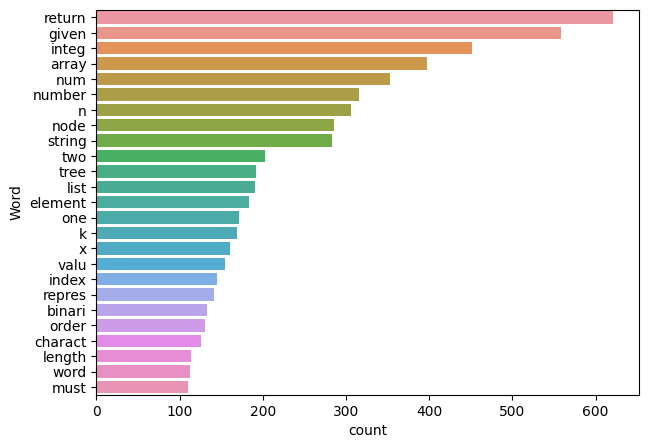

In [27]:
# print 25 most frequent words 
freqwords(books['problem_statement'], 25)

In [28]:
# Split the tags column into individual tags
books['tags'] = books['tags'].str.split(', ')


In [29]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Apply one-hot encoding on the tags column
tags_encoded = mlb.fit_transform(books['tags'])


In [30]:
# Set the one-hot encoded tags as target labels (y)
y = tags_encoded


In [35]:
print(y.shape)

(526, 60)


In [32]:
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(books['problem_statement'], y, test_size=0.2, random_state=234)


In [33]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(xtest.values.astype('U'))

In [34]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(xtrain_tfidf,ytrain)
dtpred=dt.predict(xtest_tfidf)

print("Decision Tree Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,dtpred))
print ('Report : ')
print(classification_report(ytest,dtpred))

Decision Tree Classifier

Accuracy Score : 0.05660377358490566
Report : 
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        57
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         0
           3       0.20      0.11      0.14         9
           4       0.33      0.33      0.33         3
           5       0.91      1.00      0.95        10
           6       0.33      0.17      0.22         6
           7       0.00      0.00      0.00         1
           8       0.25      0.20      0.22        10
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         0
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         0
          14       0.54      0.54      0.54        13
          15       0.50      0.50      0.50         4
        

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

In [48]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(books['problem_statement'], y, test_size=0.2, random_state=42)


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_problem_statement = vectorizer.fit_transform(X_train)
X_test_problem_statement = vectorizer.transform(X_test)

In [50]:
from sklearn.multioutput import MultiOutputClassifier

# Create and train the Multi-label Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_rf = MultiOutputClassifier(rf)
multi_rf.fit(X_train_problem_statement, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [51]:
X_test['problem_statement'] = X_test_problem_statement
# Make predictions
y_pred = multi_rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, hamming_loss, jaccard_score

accuracy = accuracy_score(y_test, y_pred)
hamming_loss = hamming_loss(y_test, y_pred)
jaccard_score = jaccard_score(y_test, y_pred, average='samples')

print('Accuracy:', accuracy)
print('Hamming Loss:', hamming_loss)
print('Jaccard Score:', jaccard_score)


ValueError: could not convert string to float: 'given sort integ array arr two integ k x return k closest integ x array result also sort ascend order integ closer x integ b x b x x b x b'